# Machine Learning with Python

Python has several packages for machine learning. We will use the most popular package:
[scikit learn](https://scikit-learn.org)

See scikit learn's section on [supervised learning](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [35]:
import pandas as pd

# data
from sklearn.datasets import load_iris

# learner
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# make plots larger
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,15

## Load data

The iris dataset comes with scikit learn. It contains four measurements for 150 flowers of three subspecies of the iris family. The class attribute is the subspecies. Details can be found on the [Wikipedia page for the iris dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set). We load the data as a [pandas dataframe](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#dataframe).

In [36]:
iris = load_iris(as_frame = True)
iris['frame']

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [37]:
X = iris['data']
y = iris['target']

print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [38]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64


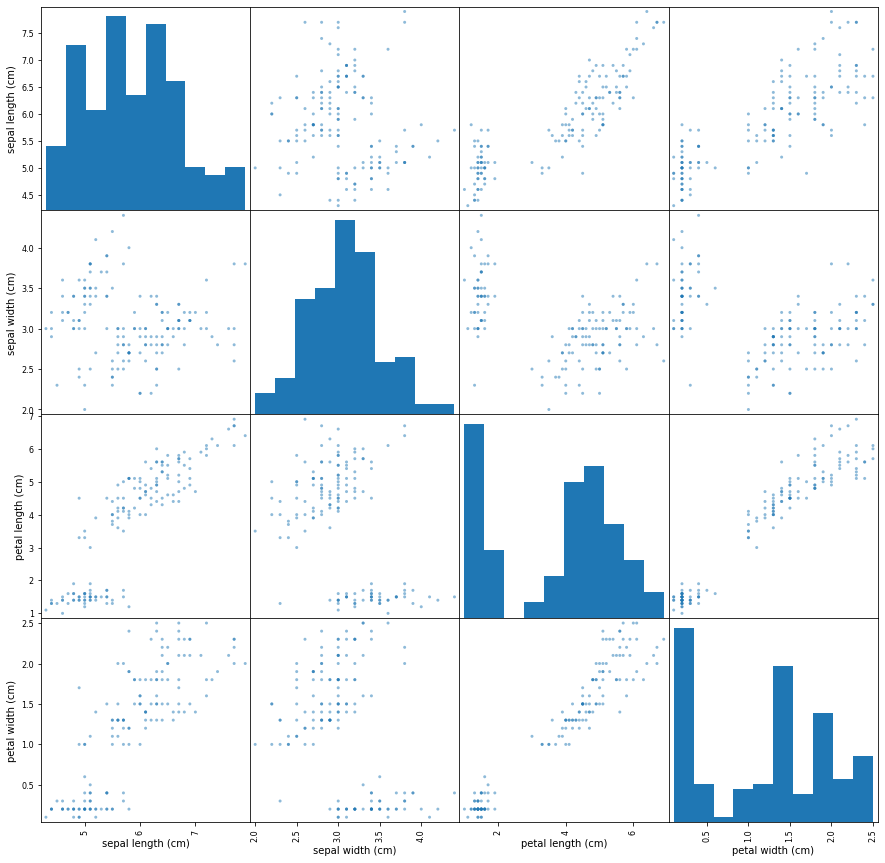

In [39]:
plt = pd.plotting.scatter_matrix(X)

 ## Create a training and test set

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
34                 4.9               3.1                1.5               0.2
127                6.1               3.0                4.9               1.8
5                  5.4               3.9                1.7               0.4
48                 5.3               3.7                1.5               0.2
114                5.8               2.8                5.1               2.4
..                 ...               ...                ...               ...
96                 5.7               2.9                4.2               1.3
83                 6.0               2.7                5.1               1.6
72                 6.3               2.5                4.9               1.5
141                6.9               3.1                5.1               2.3
75                 6.6               3.0                4.4               1.4

[120 rows x 4 columns]


In [41]:
print(X_test)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
129                7.2               3.0                5.8               1.6
37                 4.9               3.6                1.4               0.1
134                6.1               2.6                5.6               1.4
126                6.2               2.8                4.8               1.8
44                 5.1               3.8                1.9               0.4
42                 4.4               3.2                1.3               0.2
88                 5.6               3.0                4.1               1.3
51                 6.4               3.2                4.5               1.5
122                7.7               2.8                6.7               2.0
17                 5.1               3.5                1.4               0.3
87                 6.3               2.3                4.4               1.3
20                 5.4               3.4                1.7     

## Learn a decision tree on the training data

scikit-learn uses an optimized version of the CART algorithm. Learning a model in scikit-learn consists of initializing the learner (with hyperparameters, if any) and calling the fit function with the training data. For details and available hyperparameters see: https://scikit-learn.org/stable/modules/tree.html

In [42]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf

DecisionTreeClassifier()

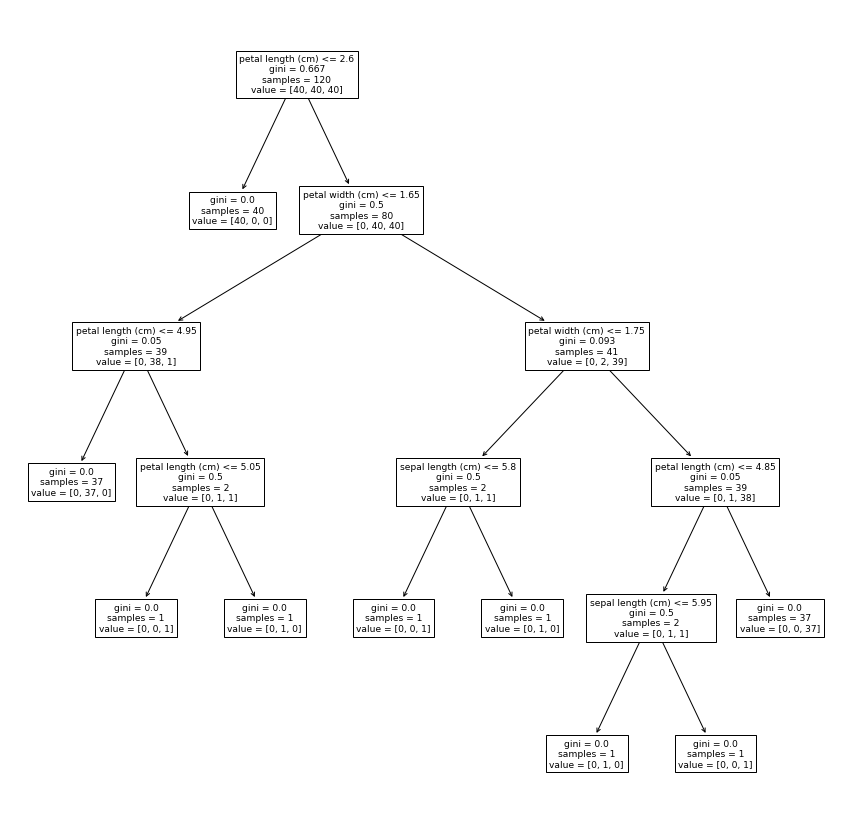

In [43]:
pl = tree.plot_tree(clf, feature_names = list(X_train.columns)) 

In [44]:
print(tree.export_text(clf, feature_names = list(X_train.columns)))

|--- petal length (cm) <= 2.60
|   |--- class: 0
|--- petal length (cm) >  2.60
|   |--- petal width (cm) <= 1.65
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- class: 1
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal length (cm) <= 5.05
|   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  5.05
|   |   |   |   |--- class: 1
|   |--- petal width (cm) >  1.65
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- sepal length (cm) <= 5.80
|   |   |   |   |--- class: 2
|   |   |   |--- sepal length (cm) >  5.80
|   |   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |   |--- class: 2
|   |   |   |--- petal length (cm) >  4.85
|   |   |   |   |--- class: 2



### Create a tree with restricted depth

Set hyperparameter `max_depth` to 3.

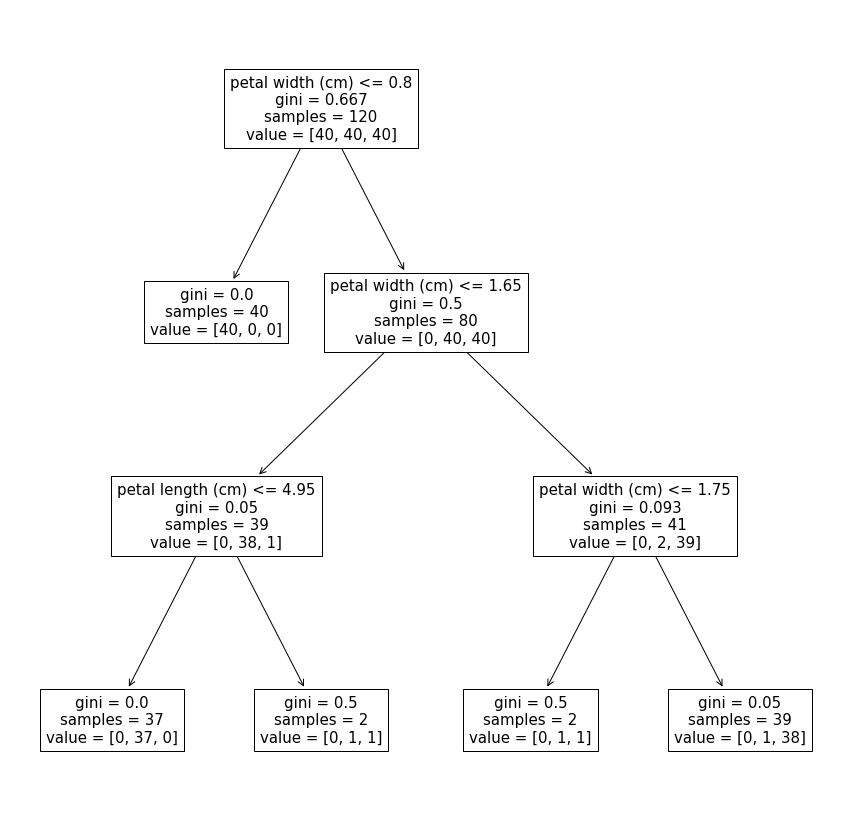

In [45]:
clf2 = tree.DecisionTreeClassifier(max_depth = 3)
clf2 = clf2.fit(X_train, y_train)
pl = tree.plot_tree(clf2, feature_names = list(X_train.columns))

## Test on the test data

In [46]:
pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

y_test:	 [2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]
pred:	 [1, 0, 1, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]


Calculate accuracy on the test data

In [47]:
accuracy_score(pred, y_test)

0.9

## Cross-validation

The goal of cross-validation is to get a more robust estimate for the model accuracy on unseen test data while using as much of the data as possible.

The data is randomly split into `cv` folds and then the model is learned (using `clf`'s fit function) `cv` times, each time it is trained on `cv`-1 folds and tested against the remaining fold. Therefore, you get `cv` many scores. The final estimate the average.  

In [48]:
scores = cross_val_score(clf, X, y, cv = 10)
print(scores)

print("Cross validated accuracy:", scores.mean())

[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 0.93333333 1.         1.        ]
Cross validated accuracy: 0.9533333333333334


## K-Nearest Neighbors Classifier 

You may want to standardize the data first since distances are measured using Euclidean distances.

In [49]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

# cross validation
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

y_test:	 [2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]
pred:	 [2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]
Cross validated accuracy: 0.9666666666666666


## Support Vector Machines

There are other kernel functions to learn non-linear decision boundaries.

In [50]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)

pred = clf.predict(X_test)

print("y_test:\t", list(y_test))
print("pred:\t",   list(pred))

# cross validation
scores = cross_val_score(clf, X, y, cv = 10)
print("Cross validated accuracy:", scores.mean())

y_test:	 [2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]
pred:	 [2, 0, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 0, 2, 2, 1]
Cross validated accuracy: 0.9733333333333334
